Visualizing distributions
=========================

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
from __future__ import print_function, division

import numpy as np
import thinkstats2

import nsfg

import thinkplot

%matplotlib inline

Let's load up the NSFG pregnancy data.

In [2]:
preg = nsfg.ReadFemPreg()
preg.shape

(13593, 244)

And select the rows corresponding to live births.

In [3]:
live = preg[preg.outcome == 1]
live.shape

(9148, 244)

We can use `describe` to generate summary statistics.

In [4]:
live.prglngth.describe()

count    9148.000000
mean       38.560560
std         2.702344
min         0.000000
25%        39.000000
50%        39.000000
75%        39.000000
max        50.000000
Name: prglngth, dtype: float64

But there is no substitute for looking at the whole distribution, not just a summary.

One way to represent a distribution is a Probability Mass Function (PMF).

`thinkstats2` provides a class named `Pmf` that represents a PMF.

A Pmf object contains a Python dictionary that maps from each possible value to its probability (that is, how often it appears in the dataset).

`Items` returns a sorted list of values and their probabilities:

In [5]:
pmf = thinkstats2.Pmf(live.prglngth)
for val, prob in pmf.Items():
    print(val, prob)

0 0.00010931351115
4 0.00010931351115
9 0.00010931351115
13 0.00010931351115
17 0.0002186270223
18 0.00010931351115
19 0.00010931351115
20 0.00010931351115
21 0.0002186270223
22 0.00076519457805
23 0.00010931351115
24 0.00142107564495
25 0.00032794053345
26 0.00382597289025
27 0.00032794053345
28 0.0034980323568
29 0.00229558373415
30 0.0150852645387
31 0.00295146480105
32 0.0125710537822
33 0.00535636204635
34 0.006558810669
35 0.0339965019676
36 0.0350896370791
37 0.0497376475732
38 0.066353301268
39 0.513008307827
40 0.121993878443
41 0.064167031045
42 0.0358548316572
43 0.0161783996502
44 0.0050284215129
45 0.0010931351115
46 0.00010931351115
47 0.00010931351115
48 0.00076519457805
50 0.0002186270223


There are some values here that are certainly errors, and some that are suspect.  For now we'll take them at face value.

There are several ways to visualize Pmfs.

`thinkplot` provides functions to plot Pmfs and other types from `thinkstats2`.

`thinkplot.Pmf` renders a Pmf as histogram (bar chart).

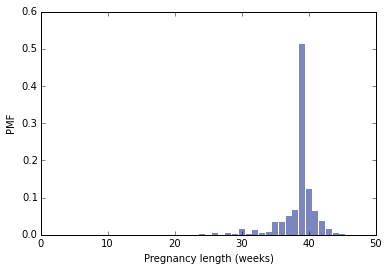

In [6]:
thinkplot.PrePlot(1)
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)',
                 ylabel='PMF', 
                 xlim=[0, 50],
                 legend=False)

`Pmf` renders the outline of the histogram.

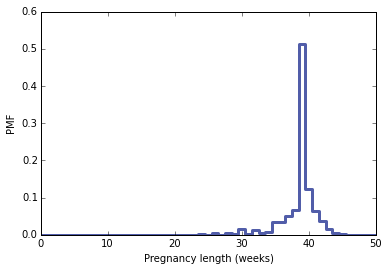

In [7]:
thinkplot.PrePlot(1)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)',
                 ylabel='PMF', 
                 xlim=[0, 50])

`Pdf` tries to render the Pmf with a smooth curve.

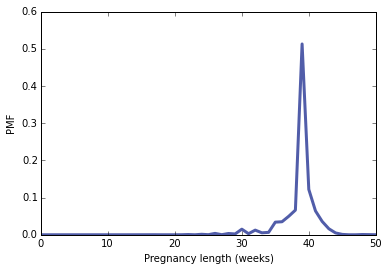

In [8]:
thinkplot.PrePlot(1)
thinkplot.Pdf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)',
                 ylabel='PMF', 
                 xlim=[0, 50])

I started with PMFs and histograms because they are familiar, but I think they are bad for exploration.

For one thing, they don't hold up well when the number of values increases.

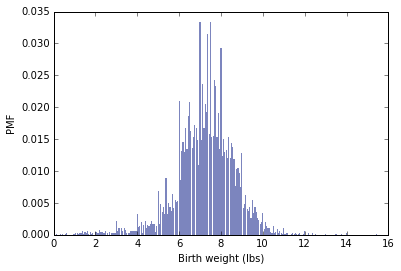

In [9]:
pmf_weight = thinkstats2.Pmf(live.totalwgt_lb)
thinkplot.PrePlot(1)
thinkplot.Hist(pmf_weight)
thinkplot.Config(xlabel='Birth weight (lbs)',
                 ylabel='PMF')

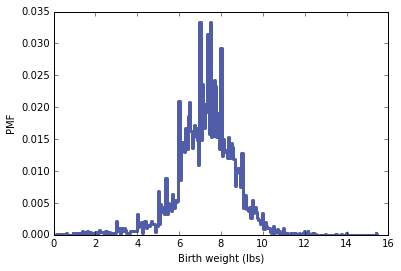

In [10]:
pmf_weight = thinkstats2.Pmf(live.totalwgt_lb)
thinkplot.PrePlot(1)
thinkplot.Pmf(pmf_weight)
thinkplot.Config(xlabel='Birth weight (lbs)',
                 ylabel='PMF')

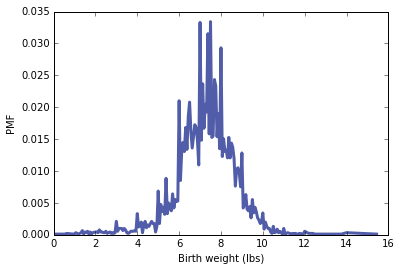

In [11]:
pmf_weight = thinkstats2.Pmf(live.totalwgt_lb)
thinkplot.PrePlot(1)
thinkplot.Pdf(pmf_weight)
thinkplot.Config(xlabel='Birth weight (lbs)',
                 ylabel='PMF')

Sometimes you can make the visualization better by binning the data:

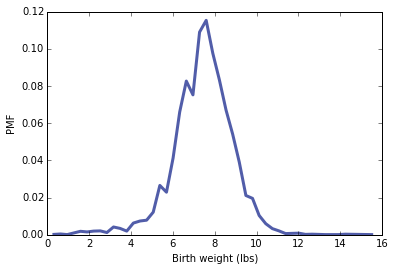

In [12]:
def bin_and_pmf(weights, num_bins):
    bins = np.linspace(0, 15.5, num_bins)
    indices = np.digitize(weights, bins)
    values = bins[indices]
    pmf_weight = thinkstats2.Pmf(values)

    thinkplot.PrePlot(1)
    thinkplot.Pdf(pmf_weight)
    thinkplot.Config(xlabel='Birth weight (lbs)',
                     ylabel='PMF')
    
bin_and_pmf(live.totalwgt_lb.dropna(), 50)

Binning is simple enough, but it is still a nuisance.

And it is fragile.  If you have too many bins, the result is noisy.  Too few, you obliterate features that might be important.

And if the bin boundaries don't align well with data boundaries, you can create artifacts.

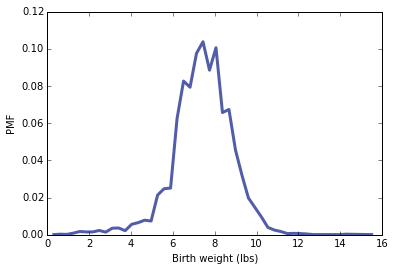

In [13]:
bin_and_pmf(live.totalwgt_lb.dropna(), 51)

There must be a better way!

Indeed there is.  In my opinion, cumulative distribution functions (CDFs) are a better choice for data exploration.

You don't have to bin the data or make any other transformation.

`thinkstats2` provides a function that makes CDFs, and `thinkplot` provides a function for plotting them.

In [14]:
data = [1, 2, 2, 5]
pmf = thinkstats2.Pmf(data)
pmf

Pmf({1: 0.25, 2: 0.5, 5: 0.25})

In [15]:
cdf = thinkstats2.Cdf(data)
cdf

Cdf([1 2 5], [ 0.25  0.75  1.  ])

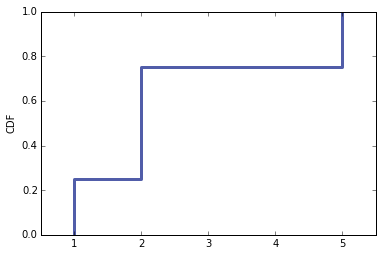

In [16]:
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(ylabel='CDF', 
                 xlim=[0.5, 5.5])

Let's see what that looks like for real data.

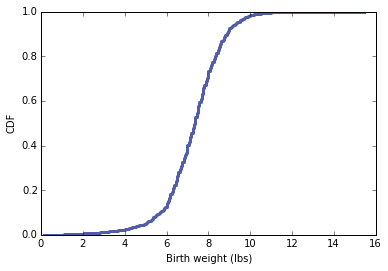

In [17]:
cdf_weight = thinkstats2.Cdf(live.totalwgt_lb)
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf_weight)
thinkplot.Config(xlabel='Birth weight (lbs)',
                 ylabel='CDF')

A CDF is a map from each value to its cumulative probability.

You can use it to compute percentiles:

In [18]:
cdf_weight.Percentile(50)

7.375

Or if you are given a value, you can compute its percentile rank.

In [19]:
cdf_weight.PercentileRank(8.3)

78.689975658331491

Looking at the CDF, it is easy to see the range of values, the central tendency and spread, as well as the overall shape of the distribution.

If there are particular values that appear often, they are visible as vertical lines.  If there are ranges where no values appear, they are visible as horizontal lines.

And one of the best things about CDFs is that you can plot several of them on the same axes for comparison.  For example, let's see if first babies are lighter than others.

In [20]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
len(firsts), len(others)

(4413, 4735)

In [21]:
cdf_firsts = thinkstats2.Cdf(firsts.totalwgt_lb, label='firsts')
cdf_others = thinkstats2.Cdf(others.totalwgt_lb, label='others')

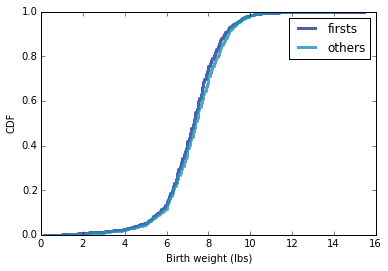

In [26]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_firsts, cdf_others])
thinkplot.Config(xlabel='Birth weight (lbs)',
                 ylabel='CDF',
                 legend=True)

Plotting the two distributions on the same axes, we can see that the distribution for others is shifted to the right; that is, toward higher values.  And we can see that the shift is close to the same over the whole distribution.

Let's see how well we can make this comparison with PMFs:

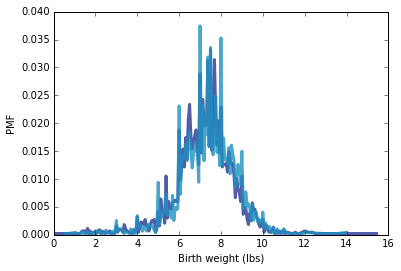

In [23]:
pmf_firsts = thinkstats2.Pmf(firsts.totalwgt_lb, label='firsts')
pmf_others = thinkstats2.Pmf(others.totalwgt_lb, label='others')

thinkplot.PrePlot(2)
thinkplot.Pdfs([pmf_firsts, pmf_others])
thinkplot.Config(xlabel='Birth weight (lbs)',
                 ylabel='PMF')

With PMFs it is hard to compare distributions.  And if you plot more than two PMFs on the same axes, it is likely to be a mess.

Reading CDFs takes some getting used to, but it is worth it!  For data exploration and visualization, CDFs are better than PMFs in almost every way.

But if you really have to generate a PMF, a good option is to estimate a smoothed PDF using Kernel Density Estimation (KDE).

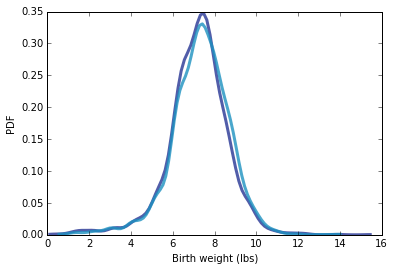

In [24]:
pdf_firsts = thinkstats2.EstimatedPdf(firsts.totalwgt_lb.dropna(), label='firsts')
pdf_others = thinkstats2.EstimatedPdf(others.totalwgt_lb.dropna(), label='others')

thinkplot.PrePlot(2)
thinkplot.Pdfs([pdf_firsts, pdf_others])
thinkplot.Config(xlabel='Birth weight (lbs)',
                 ylabel='PDF')

Like binning, KDE involves smoothing the data, so you lose some information.

And you might have to tune the "bandwidth" parameter to get the right amount of smoothing.